# California Housing society project

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

In [1]:
# Import required libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load the data 

In [4]:
data = pd.read_excel("1553768847_housing.xlsx")

In [5]:
data.dtypes # check the data types

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [6]:
data.head() # print first 5 records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
data.describe() # describe the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.mean() # check the mean of each column

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [11]:
data.fillna(data.mean(),inplace = True) # fill missing values with mean of the column

In [12]:
# convert categorical column to numerical
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['ocean_proximity'] = number.fit_transform(data['ocean_proximity'].astype('str'))

In [13]:
data['ocean_proximity'].dtype

dtype('int32')

In [14]:
# extract input and output data
y_output = data.iloc[:,9:10]
x_input = data.iloc[:,0:9]

In [15]:
x_input

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [16]:
y_output

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [17]:
# split train and test datasets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x_input,y_output,test_size = 0.2,random_state=42)

In [18]:
# shape of train and test sets
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(16512, 9) (16512, 1) (4128, 9) (4128, 1)


In [19]:
# standardise
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scalar.fit(x_train)
x_train_std = scalar.transform(x_train)
x_test_std = scalar.transform(x_test)

In [20]:
# Linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [21]:
# fit the model
linreg.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# predict output variable
y_test_pred = linreg.predict(x_test_std)

In [23]:
# print RMSE
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred))
RMSE

71098.69982050033

Bonus exercise: Perform Linear Regression with one independent variable :

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


In [24]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,4
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,4
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,4
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,4
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,1


In [25]:
x_train_single = x_train.iloc[:,7:8]
x_train_single

,median_income
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542
...,...
11284,6.3700
11964,3.0500
5390,2.9344
860,5.7192


In [26]:
x_test_single = x_test.iloc[:,7:8]
x_test_single

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250
...,...
15362,4.6050
16623,2.7266
18086,9.2298
2144,2.7850


In [27]:
fit_model = linreg.fit(x_train_single,y_train)
y_test_single = linreg.predict(x_test_single)

In [28]:
# print RMSE
from sklearn.metrics import mean_squared_error
RMSE_single = np.sqrt(mean_squared_error(y_test,y_test_single))
RMSE_single

84209.01241414454

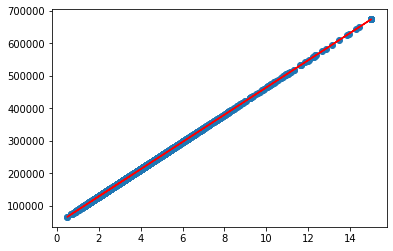

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x_test_single,y_test_single)
plt.plot(x_test_single,y_test_single,color = 'red')
plt.show()

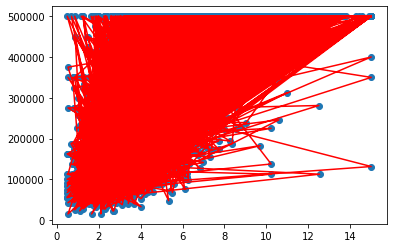

In [36]:
plt.scatter(x_train_single,y_train)
plt.plot(x_train_single,y_train,color = 'red')
plt.show()